In [28]:
# ---- Uncomment the following to run in colab, re-run this cell after installation -----
# try:
#   import decodanda
# except ImportError:
#   !pip install decodanda
#   print('\n\nInstalled Decodanda. Stopping RUNTIME. Colaboratory will restart automatically. Please run again.\n\n')
#   exit()

from IPython.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
import numpy as np
np.random.seed(123)
import matplotlib
matplotlib.rcParams['figure.dpi'] = 120
matplotlib.rcParams['figure.facecolor'] = 'w'
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

from decodanda import Decodanda, generate_synthetic_data


### Cross-condition Generalization Performance
First defined in Bernardi et al. (Cell, 2020), the Cross-Condition Generalization Performance (CCGP) is a geometrical measure of how well a classifier trained to decode a variable under specific values of the other variables generalizes to new values of the non-decoded variables.

In geometrical terms, a high CCGP is an indication of a low-dimensional geometry, where coding directions for individual variables are parallel in different conditions. For example, consider an experiment where a subject interacts with two stimuli (noted as 1, 2) at two locations in an arena
 (left, right). The problem is characterized by 2 binary variables ```identity = {1, 2}``` and ```position = {left, right}```, for a total of 4 conditions (combinations of varibales).

The relative position of these 4 conditions in the neural activity space defines the _representational geometry_ of the two variables.

We will work on two data sets:
- in the first data set, neurons respond linearly to the two variables. Hence, variables will be _disentangled_ in the neural activity space, and we expect a high CCGP. However, in a low-dimensional geometry, not all dichotomies are linearly separable. Hence, we expect a low performance for XOR decoding.
- in the second data set, neurons respond to variables with a non-linear term, so we we expect a low CCGP. However, here all dichotomies (including XOR) are linearly separable.

In both cases, we expect a high decoding performance for ```identity``` and ```position```.

In [29]:
# Generating a data set with disentangled variables (linear mixed selectivity, low-dimensional geometry)

lowdim_data = generate_synthetic_data(n_neurons=100, n_trials=80, keyA='position', keyB='identity', mixed_term=0.0)

# Generating a data set with non-linearly mixed variables (high-dimensional geometry)

highdim_data = generate_synthetic_data(n_neurons=100, n_trials=80, keyA='position', keyB='identity', mixed_term=0.75)

conditions = {
    'position': [-1, 1],
    'identity': [-1, 1]
}

In both cases, variables are well decodable:

Text(0.5, 1.0, 'Decoding: High-dimensional geometry')

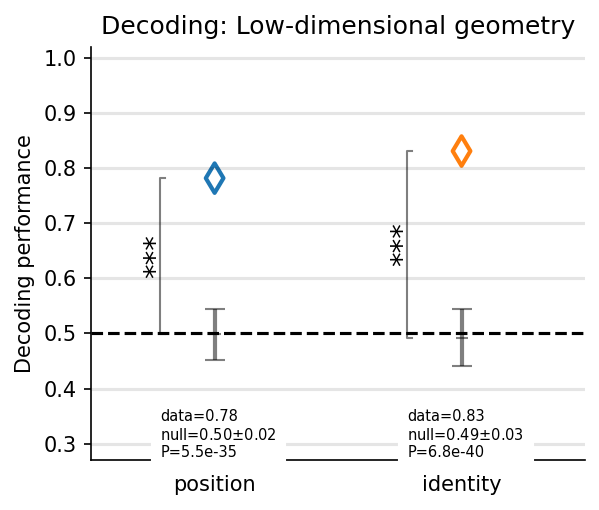

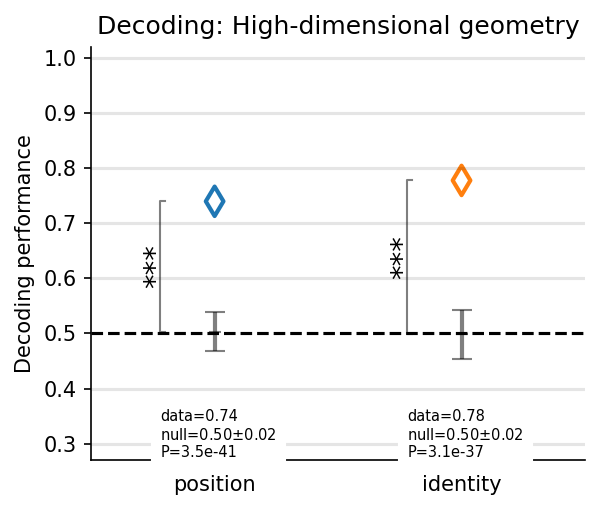

In [30]:
verbose = False # <--- set to True to log all the operations happening under the hood

# Decoding activity from a low-dimensional geometry
lowd_dec = Decodanda(data=lowdim_data, conditions=conditions, verbose=verbose)
res, null = lowd_dec.decode(training_fraction=0.75, nshuffles=20, plot=True)
plt.title('Decoding: Low-dimensional geometry')

# Decoding activity from a high-dimensional geometry
highd_dec = Decodanda(data=highdim_data, conditions=conditions, verbose=verbose)
res, null = highd_dec.decode(training_fraction=0.75, nshuffles=20, plot=True)
_ = plt.title('Decoding: High-dimensional geometry')

However, CCGP is high only for the low-dimensional geometry, where variables are linearly mixed hence disentangled.

Decodanda implements CCGP as a function of the ```Decodanda``` class, with a specific null-model that
keeps conditions decodable but breaks their geometrical relationship (see Bernardi et al. 2020, Boyle, Posani et al. 2023)

Text(0.5, 1.0, 'High-dimensional geometry\nnon-linear mixed selectivity')

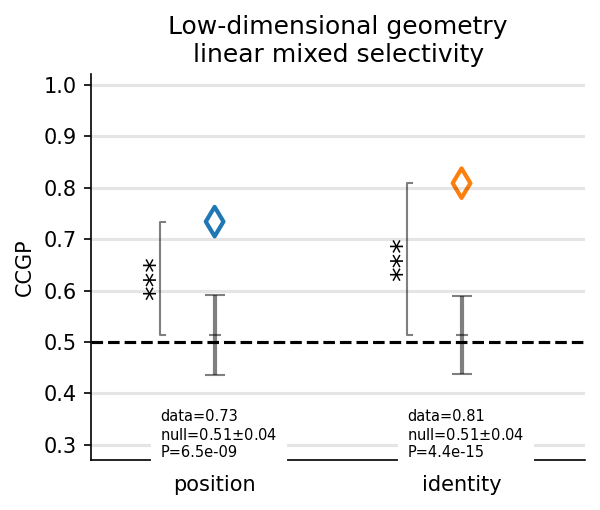

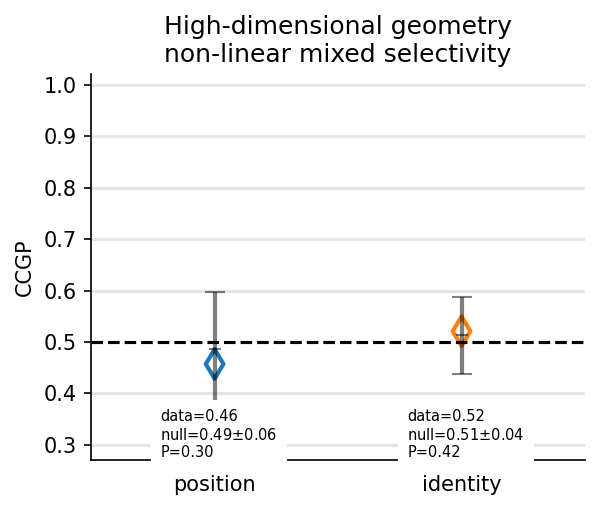

In [31]:
# Computing CCGP from a low-dimensional geometry
res, null = lowd_dec.CCGP(nshuffles=20, plot=True)
_ = plt.title('Low-dimensional geometry\nlinear mixed selectivity')

# Computing CCGP from a high-dimensional geometry
res, null = highd_dec.CCGP(nshuffles=20, plot=True)
_ = plt.title('High-dimensional geometry\nnon-linear mixed selectivity')